# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Algumas perguntas a serem feitas:

-`1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?`

-`2. Existe uma relação entre o índice de massa corporal (IMC) e a chance de um ataque cardíaco?`

-`3. Quais são as características demográficas mais comuns entre os pacientes que tiveram um ataque cardíaco (idade, sexo, região, etc.)?`

-`4. Quem faz atividade física tem menos casos de ataque cardíaco?`

-`5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?`

-`6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?`

-`7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?`

-`8. Consigo construir um modelo para prever se o paciente terá ou não ataque do coração?`


In [2]:
# Abrindo os dados
df = pd.read_csv("dataset/heart_attack_russia_youth_vs_adult.csv")
# Escolhendo essa paleta de cores
sns.set_palette("muted")

# Como estão meus dados ? 

In [ ]:
df.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [42]:
df.describe(include='all')

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
count,50000.000000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000.00000,50000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,3,2,...,3,3,3,4,2,2,NaN,NaN,NaN,2
top,NaN,NaN,Female,Urban,NaN,NaN,NaN,NaN,Moderate,False,...,Middle,Moderate,Secondary,Married,Urban,False,NaN,NaN,NaN,False
freq,NaN,NaN,24155,25034,NaN,NaN,NaN,NaN,24946,35008,...,20025,24828,20064,25099,30142,39963,NaN,NaN,NaN,39935
mean,25000.500000,35.991820,NaN,NaN,120.058636,199.852762,24.983912,79.988980,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.007100,2.997782,5.48674,NaN
std,14433.901067,14.110139,NaN,NaN,14.975835,49.998331,5.003784,11.804567,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.410351,1.149608,2.86076,NaN
min,1.000000,12.000000,NaN,NaN,60.000000,-18.700000,2.900000,60.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.00000,NaN
25%,12500.750000,24.000000,NaN,NaN,109.900000,166.100000,21.600000,70.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.00000,NaN
50%,25000.500000,36.000000,NaN,NaN,120.050000,199.900000,25.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,5.00000,NaN
75%,37500.250000,48.000000,NaN,NaN,130.200000,233.500000,28.400000,90.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,8.00000,NaN


In [8]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [43]:
df[['Urban_Rural','Region']]

,Urban_Rural,Region
0,Rural,Rural
1,Urban,Urban
2,Urban,Rural
3,Urban,Rural
4,Urban,Urban
...,...,...
49995,Urban,Rural
49996,Urban,Rural
49997,Urban,Suburban
49998,Urban,Rural


In [52]:
df['Region'].value_counts()

Region
Urban       25034
Rural       14946
Suburban    10020
Name: count, dtype: int64

In [53]:
df['Urban_Rural'].value_counts()

Urban_Rural
Urban    30142
Rural    19858
Name: count, dtype: int64

In [54]:
df.isnull().sum()

ID                           0
Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

In [57]:
df[df.duplicated()]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


## Comentários breves:

### Aparentemente não há muitos problemas nos dados, tem uma coluna que não é específicado o que é `Urban_Rural` e tem a `Region`.  A única coluna com valores nulos é para consumo de álcool (`Alcohol_Consumption`). Existe dois pacientes com valores negativos no colesterol.

# 1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?

### Objetivos:
- Exibir a ocorrência de casos para homens e para mulheres
- Exibir o número de casos de cada gênero pela faixa etária

In [97]:
# Agrupando pelo gênero e somando a quantidade de pessoas que tiveram caso
df_heart_atck_by_gender = df.groupby('Gender')['Heart_Attack'].sum()

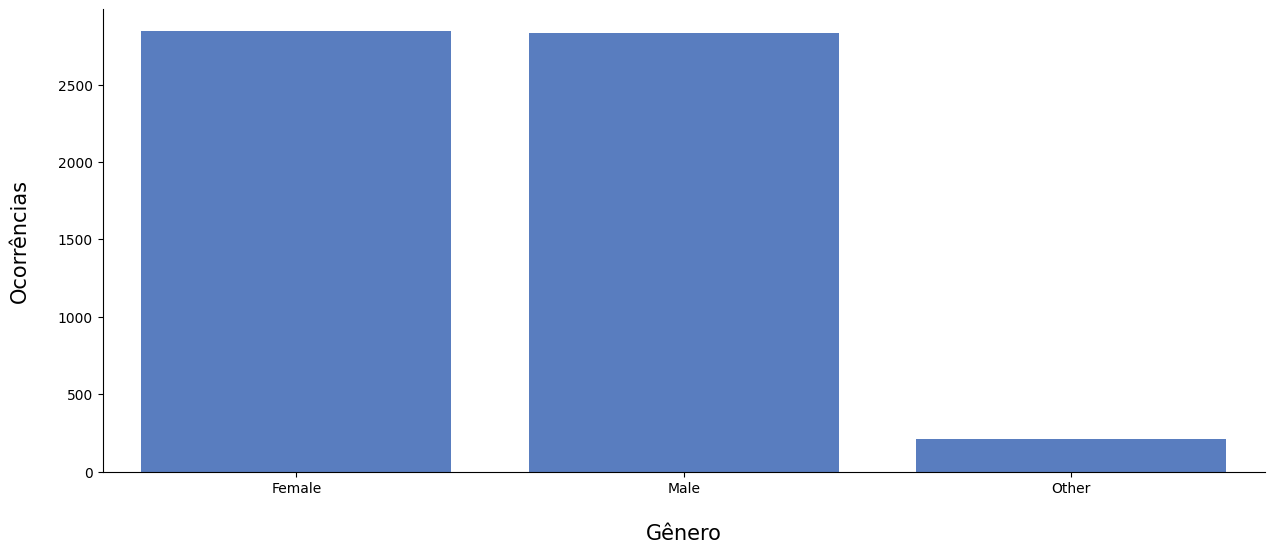

In [98]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(df_heart_atck_by_gender)
sns.despine(top=True)
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20)
ax.set_xlabel('Gênero', fontsize=15,labelpad = 20)

plt.show()

In [35]:
# Separando em feixa etária a idade 5 em 5 anos
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 65, 5))

# Agrupando por faixa etária removendo os outros, e somando as ocorrencias
df_occurrences_by_age_and_gender = df[(df['Heart_Attack']) & (df['Gender']!='Other')].groupby(['Gender','Age_Group'],observed=True)['Heart_Attack'].sum().reset_index()

# Transformando em string
df_occurrences_by_age_and_gender['Age_Group'] = df_occurrences_by_age_and_gender['Age_Group'].astype(str)

df_occurrences_by_age_and_gender

,Gender,Age_Group,Heart_Attack
0,Female,"(10, 15]",219
1,Female,"(15, 20]",305
2,Female,"(20, 25]",297
3,Female,"(25, 30]",297
4,Female,"(30, 35]",296
5,Female,"(35, 40]",311
6,Female,"(40, 45]",283
7,Female,"(45, 50]",279
8,Female,"(50, 55]",287
9,Female,"(55, 60]",269


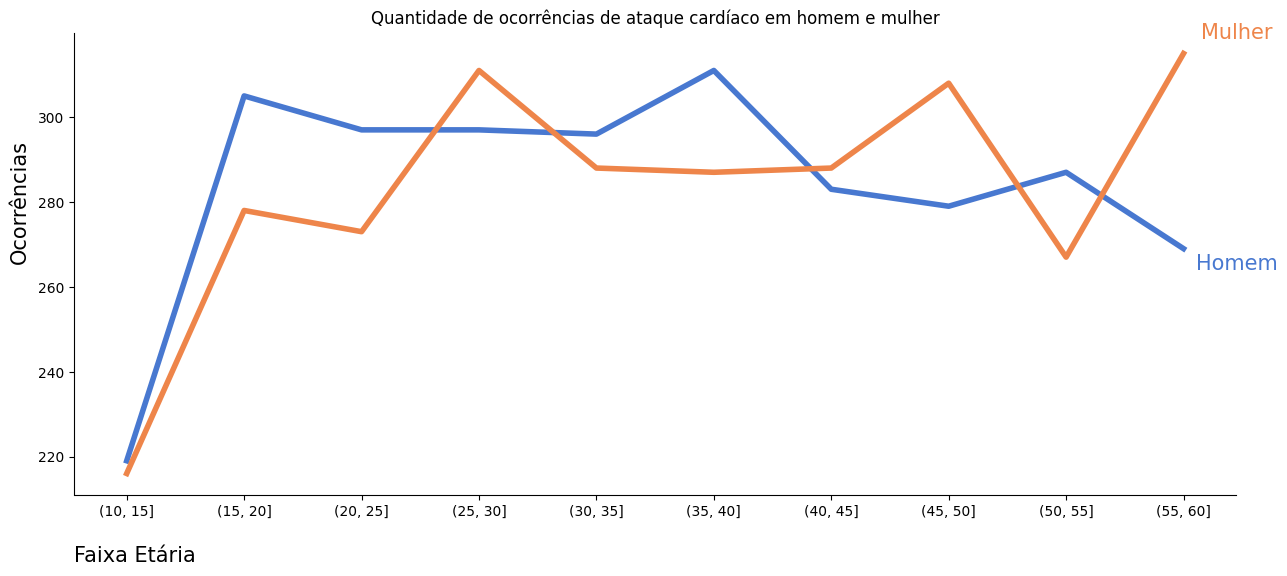

In [39]:
# Construindo o gráfico
plt.figure(figsize=(15, 6))

ax = sns.lineplot(y='Heart_Attack',x='Age_Group',hue='Gender',data=df_occurrences_by_age_and_gender,linewidth=4)
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20, verticalalignment='top', horizontalalignment='left')
ax.set_xlabel('Faixa Etária', fontsize=15,labelpad = 20,loc='left')
ax.set_title('Quantidade de ocorrências de ataque cardíaco em homem e mulher')

# Removendo linhas de grade para maior clareza
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

ax.legend().set_visible(False)
ax.text(1, 1, "Mulher", ha='center', va='center', transform=ax.transAxes, fontsize=15, color='#EE854A')
ax.text(1, 0.5, "Homem", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#4878D0')
plt.show()

In [11]:
z_scores = stats.zscore(df_occurrences_by_age_and_gender['Heart_Attack'])

# Filtrar outliers
outliers = df_occurrences_by_age_and_gender[np.abs(z_scores) > 2]  # Usando 2 como o limite

print("Outliers detectados:")
print(outliers)

Outliers detectados:
    Gender Age_Group  Heart_Attack
0   Female  (10, 15]           219
10    Male  (10, 15]           216


## Conclusões:
Não há uma diferença entre a quantidade de casos em homem e em mulheres, além disso , não foi evidenciado nenhuma faixa de valor em que ocorrece mais casos, porém faixas etárias menores não exibem uma quantidade grande de casos, a princípio a partir dos 30 anos parece haver uma constância de casos tanto para homens quanto para mulheres.

# 2. Existe uma relação entre o índice de massa corporal (IMC) e a chance de um ataque cardíaco?
### Objetivos:
- Conseguir verificar por um teste de hipóteses se há diferença entre os IMC's de dois grupos, das pessoas que tiveram ataque cardíaco e as que não tiveram.

In [3]:
# Pegando os IMC's das pessoas que tiveram ataque cardíaco
df_bmi_heart_atck = df.loc[df['Heart_Attack'],'BMI']

# Pegando os IMC's das pessoas que não tiveram ataque cardíaco
df_bmi_not_heart_atck = df.loc[~df['Heart_Attack'],'BMI']

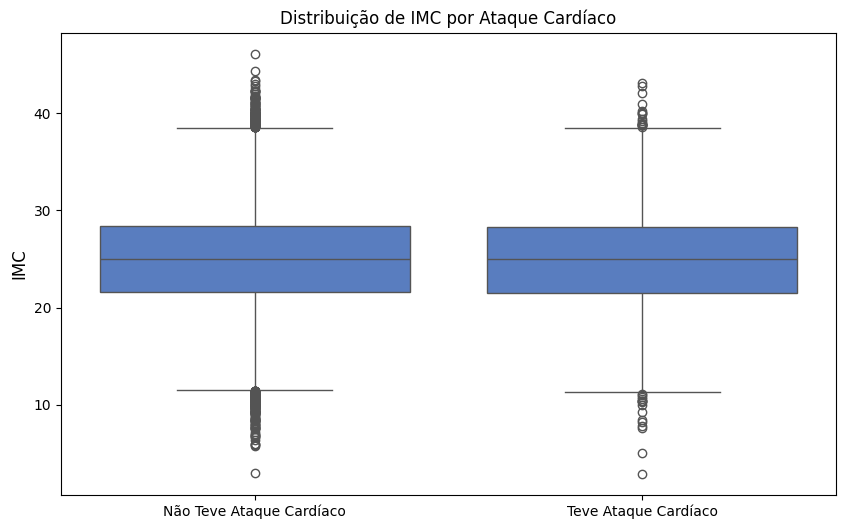

In [20]:
# Criando um boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Heart_Attack',y='BMI',data = df)

# Trocando o que false e true
ax.set_xticks([0, 1], ['Não Teve Ataque Cardíaco', 'Teve Ataque Cardíaco'])  

# Nomeando o gráfico
ax.set_ylabel('IMC',fontsize = 12)  
ax.set_xlabel('')
ax.set_title('Distribuição de IMC por Ataque Cardíaco')

plt.show()

Text(0, 0.5, '')

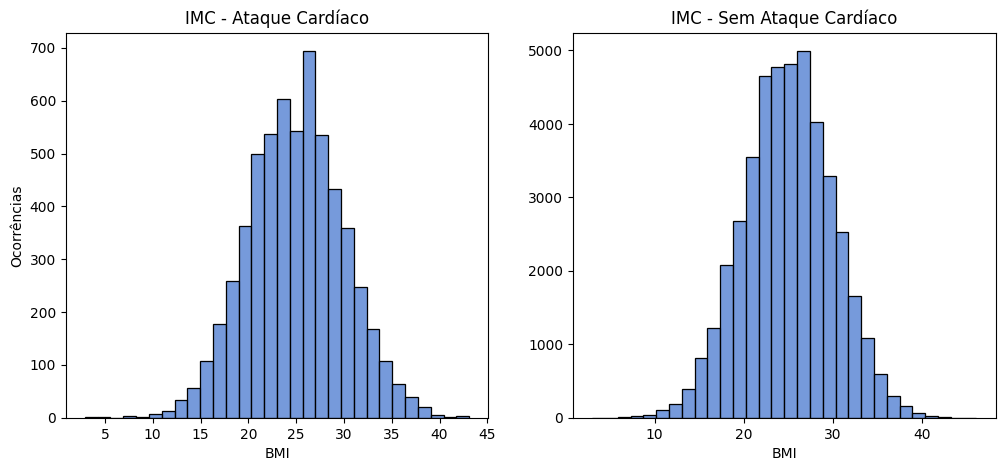

In [10]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

sns.histplot(data = df_bmi_heart_atck,ax=axes[0],bins=30)
axes[0].set_title('IMC - Ataque Cardíaco')
axes[0].set_ylabel('Ocorrências')
sns.histplot(data = df_bmi_not_heart_atck,ax=axes[1],bins=30)
axes[1].set_title('IMC - Sem Ataque Cardíaco')
axes[1].set_ylabel('')
# Removendo a borda do topo e da direita
#axes[1].spines['top'].set_visible(False)


In [11]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Rejeita hipótese nula . Os dados não são normalmente distríbuidos")
    else:
        print("Falhou em rejeitar a hipótese nula . Os dados são normalmente distríbuidos")

In [12]:
check_normality(df_bmi_heart_atck.to_list())
check_normality(df_bmi_not_heart_atck.to_list())

p value:0.2788
Falhou em rejeitar a hipótese nula . Os dados são normalmente distríbuidos
p value:0.3236
Falhou em rejeitar a hipótese nula . Os dados são normalmente distríbuidos


c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5881.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44119.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Rejeita hipótese nula . A viriância das amostras são diferentes.")
    else:
        print("Falhou em rejeitar a hipótese nula . A viriância das amostras são as mesmas.")

In [15]:
check_variance_homogeneity(df_bmi_heart_atck.to_list(),df_bmi_not_heart_atck.to_list())

p value:0.8599
Falhou em rejeitar a hipótese nula . A viriância das amostras são as mesmas.


In [19]:
ttest,p_value = stats.ttest_ind(df_bmi_heart_atck.to_list(),df_bmi_not_heart_atck.to_list())
print("p value:%.8f" % p_value)
if p_value <0.05:
    print("Há diferença significativa entre os IMCs dos dois grupos.")
else:
    print("Não há diferença significativa entre os IMC's entre os dois grupos")

p value:0.90639287
Não há diferença significativa entre os IMC's entre os dois grupos


## Conclusões:
Não houve diferença significativa estre os dois grupos, parece não haver uma relação nessa base entre esse índice e os casos. Pelo índice não levar em consideração a distribuição de gordura corporal, e apenas uma relação entre altura e peso , talvez esse resultado tenha sido por isso, outra coisa, pode ser o tamanho da amostra tendo em vista que há bem mais pessoas com não tiveram o caso do que pessoas que tiveram.

# 3.Quais são as características demográficas mais comuns entre os pacientes que tiveram um ataque cardíaco (idade, sexo, região, etc.)?

### Objetivos:
- Tentar econtrar uma maior proporção de casos em determinada região.

In [5]:
df_by_region = df.loc[df['Heart_Attack'],'Region']

In [28]:
df.loc[df['Heart_Attack'],'Region'].value_counts(normalize=True)

Region
Urban       0.493794
Rural       0.300969
Suburban    0.205237
Name: proportion, dtype: float64

In [29]:
df.loc[~df['Heart_Attack'],'Region'].value_counts(normalize=True)

Region
Urban       0.501598
Rural       0.298647
Suburban    0.199755
Name: proportion, dtype: float64

In [68]:
# Contar ataques cardíacos e não ataques cardíacos por região
heart_attack_counts = df[df['Heart_Attack']]['Region'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Region'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T


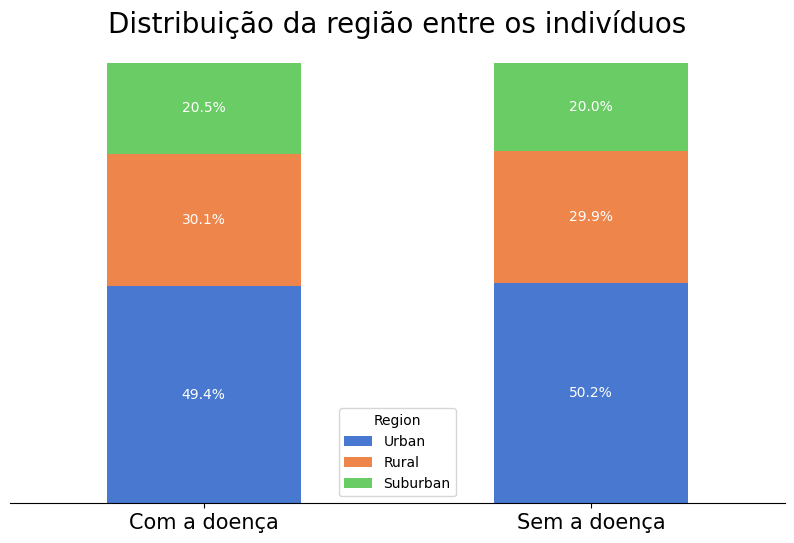

In [85]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição da região entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusão:
- Não há uma diferença significativa pela região, e por conta dos valores serem bem parelhos, eu diria que provavelmente seja uma amostra estratificada da base.

# 4. Quem faz atividade física tem menos casos de ataque cardíaco?

In [36]:
df.loc[df['Heart_Attack'],'Exercise_Level'].value_counts(normalize=True)

Exercise_Level
Moderate    0.499235
Low         0.301139
High        0.199626
Name: proportion, dtype: float64

In [34]:
df.loc[~df['Heart_Attack'],'Exercise_Level'].value_counts(normalize=True)

Exercise_Level
Moderate    0.498878
Low         0.302115
High        0.199007
Name: proportion, dtype: float64

In [94]:
# Contar ataques cardíacos e não ataques cardíacos por exercício
heart_attack_counts = df[df['Heart_Attack']]['Exercise_Level'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Exercise_Level'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

stacked_data


Exercise_Level,Moderate,Low,High
Heart_Attack,0.499235,0.301139,0.199626
No_Heart_Attack,0.498878,0.302115,0.199007


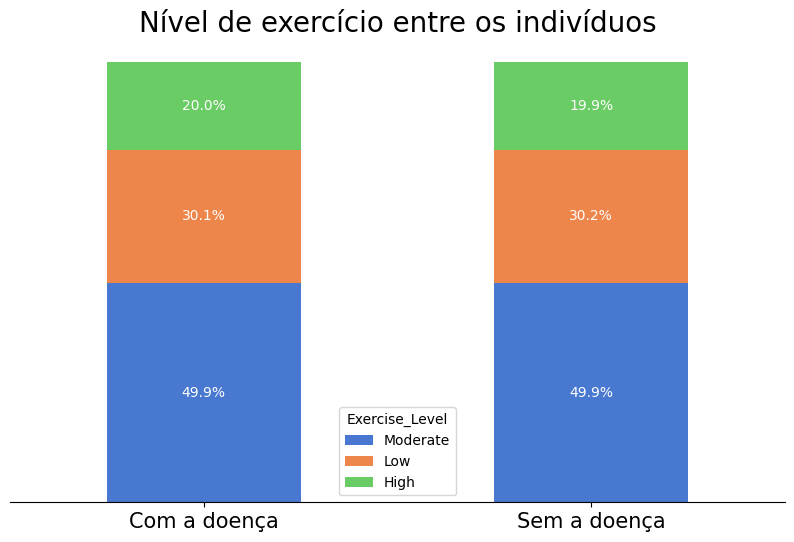

In [95]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Nível de exercício entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusões:
- Parece ser o mesmo caso que o da região onde parece não haver diferença entre os indivíduos

# 5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?

In [99]:
df.loc[df['Heart_Attack'],'Heart_Disease_History'].value_counts(normalize=True)

Heart_Disease_History
False    0.857337
True     0.142663
Name: proportion, dtype: float64

In [100]:
df.loc[~df['Heart_Attack'],'Heart_Disease_History'].value_counts(normalize=True)

Heart_Disease_History
False    0.852422
True     0.147578
Name: proportion, dtype: float64

In [101]:
# Contar ataques cardíacos e não ataques cardíacos por histórico de doença
heart_attack_counts = df[df['Heart_Attack']]['Heart_Disease_History'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Heart_Disease_History'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

stacked_data

Heart_Disease_History,False,True
Heart_Attack,0.857337,0.142663
No_Heart_Attack,0.852422,0.147578


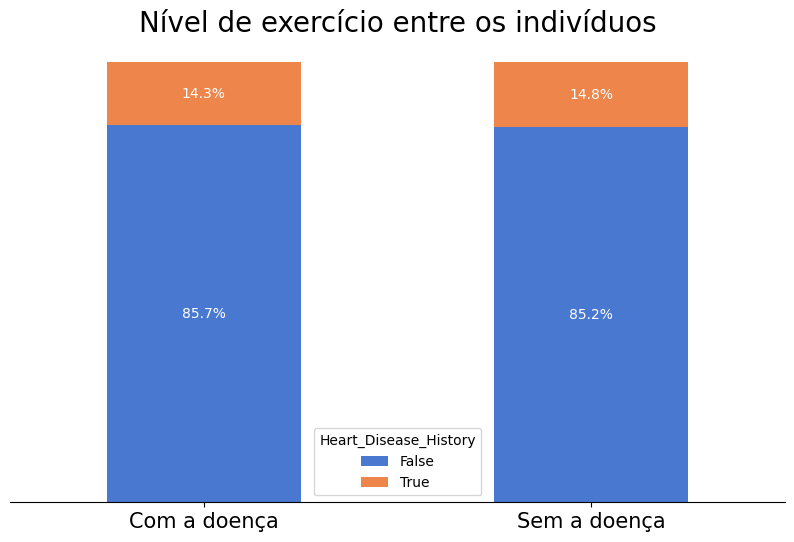

In [102]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Nível de exercício entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

# Conclusões:
- Mesmo caso da região e do nível de exercício

# 6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?

In [103]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

<Axes: xlabel='Heart_Attack', ylabel='Cholesterol'>

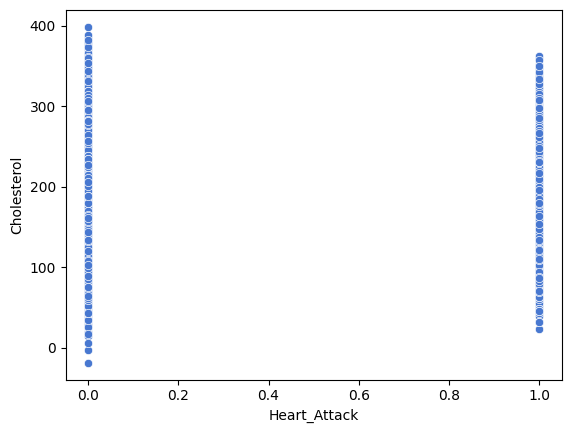

In [104]:
sns.scatterplot(x='Heart_Attack',y='Cholesterol',data=df)

In [41]:
df.loc[~df['Heart_Attack'],'Diabetes'].value_counts(normalize=True)

Diabetes
False    0.849135
True     0.150865
Name: proportion, dtype: float64

In [42]:
df.loc[df['Heart_Attack'],'Diabetes'].value_counts(normalize=True)

Diabetes
False    0.854447
True     0.145553
Name: proportion, dtype: float64

In [44]:
df.loc[df['Heart_Attack']]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
6,7,50,Male,Suburban,116.8,206.9,27.9,75,High,True,...,Middle,Moderate,Primary,Married,Urban,True,1,1.7,10,True
8,9,34,Male,Urban,131.8,244.6,24.4,65,Low,False,...,High,Moderate,Primary,Married,Rural,False,1,4.7,7,False
15,16,14,Female,Suburban,121.9,242.1,18.2,73,Moderate,False,...,Low,Low,Secondary,Married,Rural,True,1,1.4,2,False
21,22,49,Male,Urban,120.9,202.9,25.8,63,High,False,...,Low,Moderate,Secondary,Married,Rural,False,4,1.8,3,False
28,29,36,Male,Rural,104.8,241.8,24.2,98,High,False,...,Low,High,Secondary,Single,Urban,True,5,3.5,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,49979,53,Female,Urban,153.3,217.1,20.5,61,Moderate,False,...,Middle,High,Primary,Single,Rural,False,5,2.8,9,False
49982,49983,24,Female,Rural,65.7,200.1,24.0,99,Moderate,True,...,Middle,Low,Secondary,Married,Urban,False,4,2.4,2,False
49988,49989,53,Male,Rural,133.4,195.9,29.7,71,Low,True,...,Middle,Low,Primary,Single,Urban,False,4,2.5,10,False
49991,49992,50,Male,Suburban,134.0,230.7,26.2,97,Moderate,True,...,Middle,Moderate,Secondary,Married,Urban,False,4,2.8,7,False


In [45]:
df.loc[~df['Heart_Attack']]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,37,Male,Rural,137.2,163.2,22.2,91,Low,True,...,Low,Moderate,Higher,Single,Urban,False,2,3.6,4,False
49995,49996,56,Other,Rural,87.7,256.8,25.3,71,Low,True,...,Middle,High,Primary,Divorced,Urban,True,4,4.9,1,False
49996,49997,16,Male,Rural,125.2,102.9,25.1,77,Moderate,True,...,Middle,High,Secondary,Single,Urban,False,3,4.4,4,True
49997,49998,46,Female,Suburban,116.2,160.6,27.7,63,Low,True,...,Middle,Low,Secondary,Single,Urban,False,2,2.4,7,False


In [46]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [47]:
df.loc[df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.396361
Mixed        0.308281
Unhealthy    0.295358
Name: proportion, dtype: float64

In [49]:
df.loc[~df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.395703
Mixed        0.303089
Unhealthy    0.301208
Name: proportion, dtype: float64

In [51]:
df.loc[df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.026441081448733)

In [52]:
df.loc[~df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.009467576327659)

In [57]:
df.loc[df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.898997
True     0.101003
Name: proportion, dtype: float64

In [58]:
df.loc[~df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.900904
True     0.099096
Name: proportion, dtype: float64

In [ ]:
df

In [73]:
grouped_data = df.groupby(['Cholesterol', 'Diabetes', 'Stress_Level', 'Family_History'])['Heart_Attack'].mean().reset_index()
key_risk_factors = grouped_data.sort_values('Heart_Attack', ascending=False)



print("Top 10 key risk factors contributing to heart attacks")
key_risk_factors.reset_index()

Top 10 key risk factors contributing to heart attacks


,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
32023,3158,126.7,True,8,False,0.0
32024,56,47.2,False,4,True,0.0
32025,57,47.2,False,8,True,0.0
32026,3159,126.7,True,10,True,0.0


In [72]:
key_risk_factors.reset_index()[key_risk_factors.reset_index()['Heart_Attack']==1]

,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
2453,30475,291.5,False,6,False,1.0
2454,4901,140.7,False,10,False,1.0
2455,30506,291.9,False,9,False,1.0
2456,30507,291.9,False,10,True,1.0


In [74]:
df.loc[df['Heart_Attack'],'Cholesterol'].value_counts(normalize=True)

Cholesterol
212.4    0.002211
196.0    0.002040
177.7    0.002040
206.3    0.001870
199.6    0.001870
           ...   
191.5    0.000170
94.4     0.000170
331.7    0.000170
88.0     0.000170
310.0    0.000170
Name: proportion, Length: 1945, dtype: float64